Cleaning: Removed 150 rows with invalid dates (Discharge before Admission).

--- Summary Statistics (Clean Data) ---
               Age  LengthOfStay
count  4511.000000   4850.000000
mean     47.270672      5.466186
std      27.939515      2.894122
min       0.000000      1.000000
25%      23.000000      3.000000
50%      47.000000      5.000000
75%      72.000000      8.000000
max      95.000000     10.000000

Most Common Diagnosis: Unknown
Average Length of Stay: 5.47 days


C:\Users\User\AppData\Local\Temp\ipykernel_13820\3229592180.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Diagnosis', data=df_clean, order=df_clean['Diagnosis'].value_counts().index[:10], palette='magma')


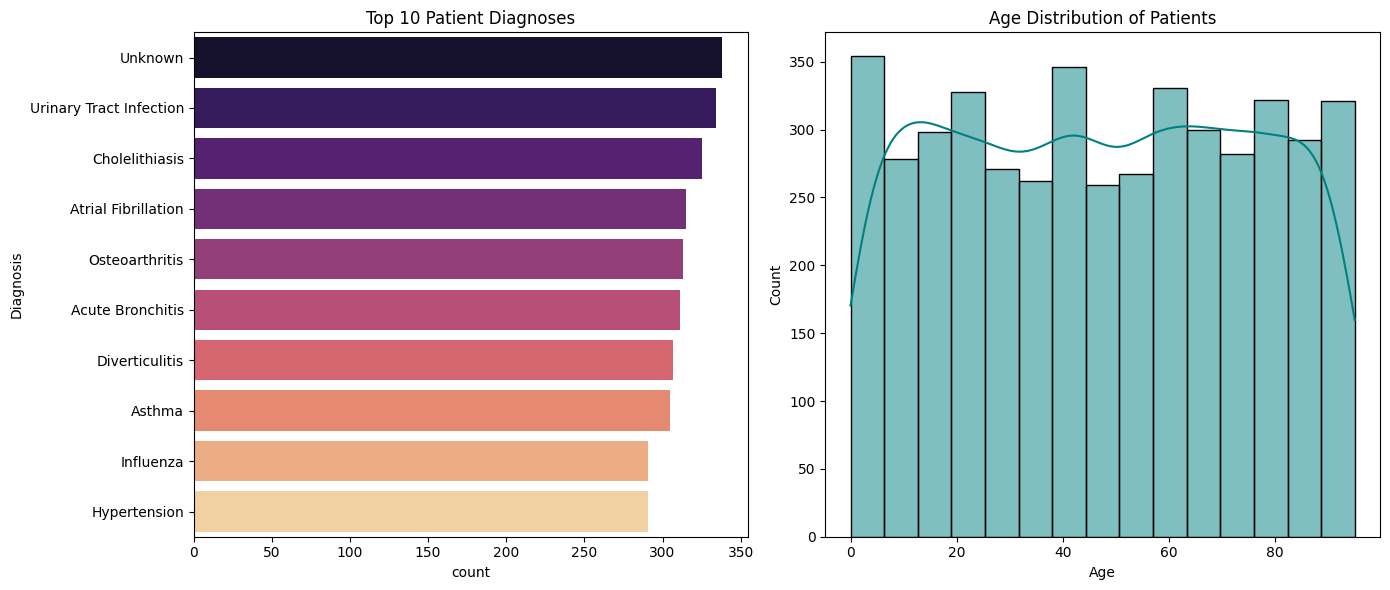

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('hospital_patients_real_world.csv')


df['AdmissionDate'] = pd.to_datetime(df['AdmissionDate'])
df['DischargeDate'] = pd.to_datetime(df['DischargeDate'])


df['Diagnosis'] = df['Diagnosis'].fillna('Unknown')


df['LengthOfStay'] = (df['DischargeDate'] - df['AdmissionDate']).dt.days


dirty_rows_count = len(df[df['LengthOfStay'] < 0])
print(f"Cleaning: Removed {dirty_rows_count} rows with invalid dates (Discharge before Admission).")


df_clean = df[df['LengthOfStay'] >= 0].copy()


print("\n--- Summary Statistics (Clean Data) ---")
print(df_clean[['Age', 'LengthOfStay']].describe())


top_diagnosis = df_clean['Diagnosis'].value_counts().idxmax()
avg_stay = df_clean['LengthOfStay'].mean()

print(f"\nMost Common Diagnosis: {top_diagnosis}")
print(f"Average Length of Stay: {avg_stay:.2f} days")


plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
sns.countplot(y='Diagnosis', data=df_clean, order=df_clean['Diagnosis'].value_counts().index[:10], palette='Set2')
plt.title('Top 10 Patient Diagnoses')


plt.subplot(1, 2, 2)
sns.histplot(df_clean['Age'], bins=15, kde=True, color='teal')
plt.title('Age Distribution of Patients')

plt.tight_layout()
plt.show()